# 임베딩 레이어

In [1]:
import torch
import torch.nn as nn

# 임베딩 레이어 생성
num_embeddings = 1000  # 어휘 크기 - 임베딩할 고유한 토큰(예: 단어)의 총 개수입니다.
embedding_dim = 50     # 임베딩 차원 - 각 토큰을 표현할 벡터의 차원
embedding_layer = nn.Embedding(num_embeddings=num_embeddings, embedding_dim=embedding_dim)

# 입력 데이터 (예: 단어 인덱스)
input_data = torch.LongTensor([1, 4, 3, 2])

# 임베딩 적용
embedded_data = embedding_layer(input_data)

print("입력 데이터 shape:", input_data.shape)
print("임베딩된 데이터 shape:", embedded_data.shape)

입력 데이터 shape: torch.Size([4])
임베딩된 데이터 shape: torch.Size([4, 50])


In [2]:
embedding_layer

Embedding(1000, 50)

In [3]:
input_data

tensor([1, 4, 3, 2])

# 라벨인코더랑 임베딩 레이어랑 무슨 관계

In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn

# 예시 데이터
route_ids = ['10002120', '10003130', '10001110', '10002120', '10003130']

# 1. LabelEncoder를 사용하여 노선 ID를 정수로 변환
le = LabelEncoder()
encoded_routes = le.fit_transform(route_ids)

print("le.classes_ : ", le.classes_)
print("인코딩된 노선 ID:", encoded_routes)

le.classes_ :  ['10001110' '10002120' '10003130']
인코딩된 노선 ID: [1 2 0 1 2]


In [6]:
# 2. 딥러닝 모델 정의 (간단한 예시)
class SimpleModel(nn.Module):
    def __init__(self, num_routes, embedding_dim, hidden_dim, output_dim):
        super(SimpleModel, self).__init__()
        self.embedding = nn.Embedding(num_routes, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.embedding(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:

# 모델 파라미터
num_routes = len(le.classes_)
embedding_dim = 10
hidden_dim = 20
output_dim = 5  # 예시로, 5개의 출력 클래스가 있다고 가정

# 모델 인스턴스 생성
model = SimpleModel(num_routes, embedding_dim, hidden_dim, output_dim)

# 3. 학습 과정 (간략히 표현)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# 가상의 타겟 데이터
y = torch.tensor([0, 1, 2, 0, 1])

# 학습 루프
for epoch in range(3):
    optimizer.zero_grad()
    outputs = model(torch.tensor(encoded_routes))
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

print("학습 완료")

학습 완료


In [13]:

# 4. 추론 과정
new_route_id = '10001110'
encoded_new_route = le.transform([new_route_id])
print(encoded_new_route)

[0]


In [14]:

prediction = model(torch.tensor(encoded_new_route))
print(f"노선 ID {new_route_id}에 대한 예측:", prediction)

노선 ID 10001110에 대한 예측: tensor([[ 0.1844, -0.0940,  0.1843, -0.2632, -0.5334]],
       grad_fn=<AddmmBackward0>)


In [15]:

# 5. 예측 결과 해석 (예: 가장 높은 확률의 클래스 선택)
predicted_class = torch.argmax(prediction, dim=1).item()
print(f"예측된 클래스: {predicted_class}")

예측된 클래스: 0


# LabelEncoder 새로운 종류 들어오면?


In [35]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 기존에 학습된 상태
label_encoder_route = LabelEncoder()
original_data = [1001, 1002, 1003]
label_encoder_route.classes_ = np.array(original_data)
print(f'label_encoder_route.classes_ : {label_encoder_route.classes_}')

encoded_original_data = label_encoder_route.fit_transform(original_data)
print(f'encoded_original_data: {encoded_original_data}')

test_original_data = [1002, 1003, 1001, 1003]
encoded_test_original_data = label_encoder_route.transform(test_original_data)
print(f'encoded_test_original_data: {encoded_test_original_data}')


label_encoder_route.classes_ : [1001 1002 1003]
encoded_original_data: [0 1 2]
encoded_test_original_data: [1 2 0 2]


In [36]:

# 새로운 구간 ID 추가
new_routes = [1004]
label_encoder_route.classes_ = np.append(label_encoder_route.classes_, new_routes)
print(f'new label_encoder_route.classes_ : {label_encoder_route.classes_}')

# 새로운 데이터셋
new_data = {'BUSROUTE_ID': [1001, 1002, 1003, 1004]}
# 인코딩 수행
encoded_ids = label_encoder_route.transform(new_data['BUSROUTE_ID'])
print("Encoded IDs:", encoded_ids)

test_added_data = {'BUSROUTE_ID': [1002, 1003, 1001, 1003, 1004, 1004]}
encoded_test_added_data = label_encoder_route.transform(test_added_data['BUSROUTE_ID'])
print(f'encoded_test_added_data: {encoded_test_added_data}')

new label_encoder_route.classes_ : [1001 1002 1003 1004]
Encoded IDs: [0 1 2 3]
encoded_test_added_data: [1 2 0 2 3 3]


# 판다스 isin

In [81]:
import pandas as pd

# 테스트용 데이터 생성
test_data = pd.DataFrame({'BUSINFOUNIT_ID': [1, 2, 3, 4, 5]})
label_encoder_classes = ['3', '4', '6']
print('test_data : \n', test_data)

# BUSINFOUNIT_ID를 문자열로 변환
new_data_ids = test_data['BUSINFOUNIT_ID'].astype(str)
print('new_data_ids : \n', new_data_ids)

test_data : 
    BUSINFOUNIT_ID
0               1
1               2
2               3
3               4
4               5
new_data_ids : 
 0    1
1    2
2    3
3    4
4    5
Name: BUSINFOUNIT_ID, dtype: object


In [82]:
# isin 함수 사용
valid_ids = new_data_ids.isin(label_encoder_classes)

# 결과 출력
print(valid_ids)
print(test_data[valid_ids])

0    False
1    False
2     True
3     True
4    False
Name: BUSINFOUNIT_ID, dtype: bool
   BUSINFOUNIT_ID
2               3
3               4


In [83]:
test_data = test_data[valid_ids]
print('인덱스 리셋 전 test_data : \n', test_data)

test_data.reset_index(drop=True, inplace=True)
print('인덱스 리셋 후 test_data : \n', test_data)

인덱스 리셋 전 test_data : 
    BUSINFOUNIT_ID
2               3
3               4
인덱스 리셋 후 test_data : 
    BUSINFOUNIT_ID
0               3
1               4


# 판다스 reset_index

In [65]:
df = pd.DataFrame([[1,2],[3,4],[5,6]],['row1','row2','row3'],['col1','col2'])
print(df)

      col1  col2
row1     1     2
row2     3     4
row3     5     6


In [66]:
print(df.reset_index())

  index  col1  col2
0  row1     1     2
1  row2     3     4
2  row3     5     6


In [68]:
print(df.reset_index(drop=True))

   col1  col2
0     1     2
1     3     4
2     5     6


In [69]:
df.reset_index(inplace=True)
print(df)

  index  col1  col2
0  row1     1     2
1  row2     3     4
2  row3     5     6


In [70]:
import pandas as pd

# 기본 DataFrame 생성 및 확인

# 간단한 데이터프레임 생성
data = {
    'A': [10, 20, 30, 40],
    'B': ['a', 'b', 'c', 'd']
}

df = pd.DataFrame(data)
print("원본 데이터프레임:")
print(df)


원본 데이터프레임:
    A  B
0  10  a
1  20  b
2  30  c
3  40  d


In [71]:
## 인덱스 변경 및 reset_index 사용 전/후 비교
# 
# 인덱스를 임의로 변경
df.index = [100, 101, 102, 103]
print("\n인덱스를 변경한 데이터프레임:")
print(df)

# 인덱스를 재설정
df_reset = df.reset_index()
print("\nreset_index() 적용 후:")
print(df_reset)



인덱스를 변경한 데이터프레임:
      A  B
100  10  a
101  20  b
102  30  c
103  40  d

reset_index() 적용 후:
   index   A  B
0    100  10  a
1    101  20  b
2    102  30  c
3    103  40  d


In [72]:
# 기존 인덱스를 삭제하고 새로운 인덱스 설정
df_reset_drop = df.reset_index(drop=True)
print("\nreset_index(drop=True) 적용 후:")
print(df_reset_drop)



reset_index(drop=True) 적용 후:
    A  B
0  10  a
1  20  b
2  30  c
3  40  d


# torch.cat

In [88]:
import torch

batch_size, N, K = 3, 1, 2

x = torch.rand(batch_size, N, K) # [M, N, K]
y = torch.rand(batch_size, N, K) # [M, N, K]
print(x.shape)
print(y.shape)
print(x)

torch.Size([3, 1, 2])
torch.Size([3, 1, 2])
tensor([[[0.0622, 0.4037]],

        [[0.3235, 1.0000]],

        [[0.7639, 0.4057]]])


In [90]:

output1 = torch.cat([x,y], dim=1) #[M, N+N, K]
output2 = torch.cat([x,y], dim=2) #[M, N, K+K]
print(output1.shape)
print(output2.shape)
print(output1)
print(output2)


torch.Size([3, 2, 2])
torch.Size([3, 1, 4])
tensor([[[0.0622, 0.4037],
         [0.4255, 0.7586]],

        [[0.3235, 1.0000],
         [0.0943, 0.2159]],

        [[0.7639, 0.4057],
         [0.5985, 0.4045]]])
tensor([[[0.0622, 0.4037, 0.4255, 0.7586]],

        [[0.3235, 1.0000, 0.0943, 0.2159]],

        [[0.7639, 0.4057, 0.5985, 0.4045]]])


# 원핫인코딩 reindex

In [1]:
import pandas as pd

data_train = pd.DataFrame({
    'DAY_TYPE': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'VALUE': [10, 20, 30, 40, 50, 60, 70]
})
print(data_train)

    DAY_TYPE  VALUE
0     Monday     10
1    Tuesday     20
2  Wednesday     30
3   Thursday     40
4     Friday     50
5   Saturday     60
6     Sunday     70


In [5]:
# 원핫 인코딩
day_type_train = pd.get_dummies(data_train['DAY_TYPE'])

print(day_type_train)
print()
print(day_type_train.shape)
print(day_type_train.values)


   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0   False    True     False   False     False    False      False
1   False   False     False   False     False     True      False
2   False   False     False   False     False    False       True
3   False   False     False   False      True    False      False
4    True   False     False   False     False    False      False
5   False   False      True   False     False    False      False
6   False   False     False    True     False    False      False

(7, 7)
[[False  True False False False False False]
 [False False False False False  True False]
 [False False False False False False  True]
 [False False False False  True False False]
 [ True False False False False False False]
 [False False  True False False False False]
 [False False False  True False False False]]


In [4]:
import pandas as pd

# 간단한 데이터프레임 생성
data = pd.DataFrame({
    'DATA_TYPE': ['PATRN', 'EVENT', 'PATRN', 'EVENT', 'PATRN']
})

# 원핫 인코딩 수행
encoded_data = pd.get_dummies(data['DATA_TYPE'])

# 인코딩된 데이터 확인
print("원핫 인코딩된 데이터:\n", encoded_data)
print("\n컬럼 순서:", encoded_data.columns.tolist())


원핫 인코딩된 데이터:
    EVENT  PATRN
0  False   True
1   True  False
2  False   True
3   True  False
4  False   True

컬럼 순서: ['EVENT', 'PATRN']


In [4]:
data_test = pd.DataFrame({
    'DAY_TYPE': ['Monday'],  # 하루치 데이터만 포함
    'VALUE': [15]
})
print(data_test)
print()

# 원핫 인코딩 (하루치 데이터만 존재)
day_type_test = pd.get_dummies(data_test['DAY_TYPE'])

print(day_type_test)
print()
print(day_type_test.shape)


  DAY_TYPE  VALUE
0   Monday     15

   Monday
0    True

(1, 1)


In [6]:
all_days = [1, 2, 3, 4, 5, 6, 7]
day_type_test_reindexed = day_type_test.reindex(columns=all_days, fill_value=0)

print(day_type_test_reindexed)
print(day_type_test_reindexed.values)


   Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
0       0    True        0          0         0       0         0
[[0 True 0 0 0 0 0]]


# 해시 인코딩

In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt

# 샘플 데이터 생성
data = [
    "I love machine learning",
    "I enjoy programming",
    "Data science is interesting",
    "Python is a great language",
    "Neural networks are powerful"
]


In [5]:
# HashingVectorizer 초기화 (4개의 피처로 해싱)
n_features = 4
vectorizer = HashingVectorizer(n_features=n_features, alternate_sign=False)

# 텍스트를 해시 인코딩
hashed_data = vectorizer.transform(data)

# 결과 출력
print("\n해시 인코딩 결과:")
print(hashed_data.toarray())



해시 인코딩 결과:
[[0.57735027 0.57735027 0.57735027 0.        ]
 [0.         0.70710678 0.70710678 0.        ]
 [0.         0.9486833  0.         0.31622777]
 [0.40824829 0.81649658 0.40824829 0.        ]
 [0.40824829 0.81649658 0.         0.40824829]]


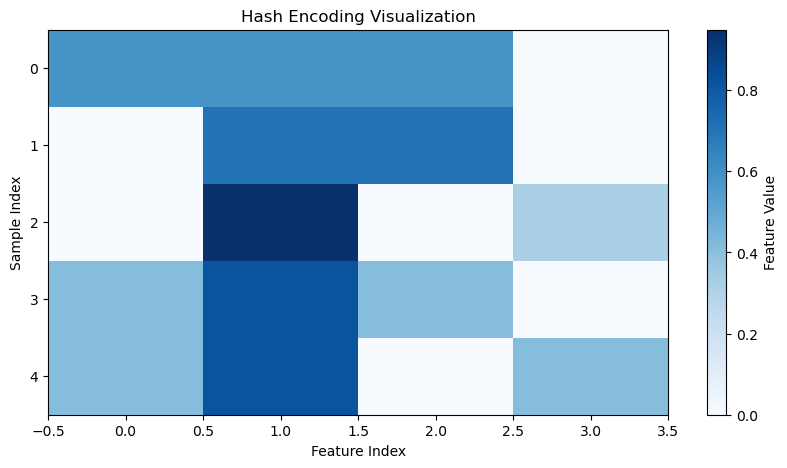

In [6]:
# 결과 시각화
plt.figure(figsize=(10, 5))
plt.imshow(hashed_data.toarray(), cmap='Blues', aspect='auto')
plt.title('Hash Encoding Visualization')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')
plt.colorbar(label='Feature Value')
plt.show()


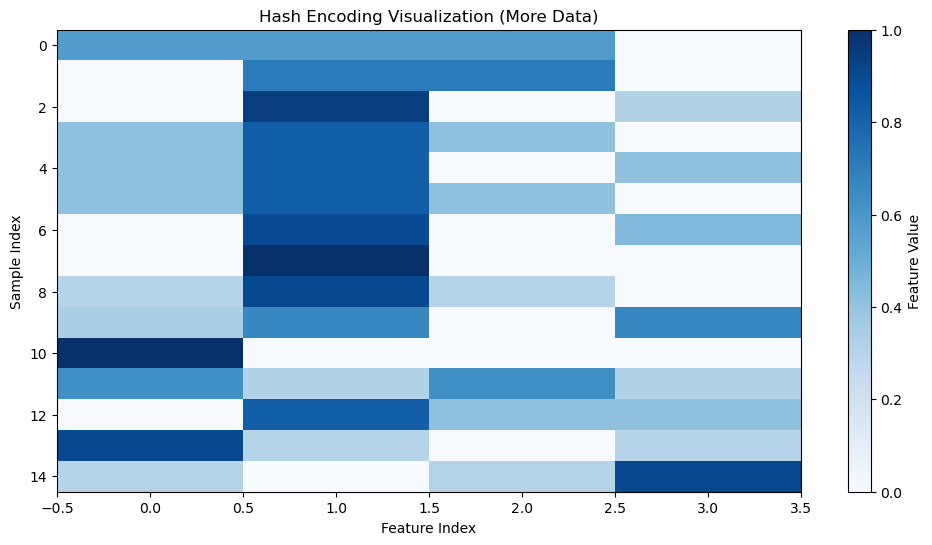

In [7]:
# 더 많은 샘플 데이터 생성
more_data = [
    "Machine learning is fascinating",
    "I love data science",
    "Programming is fun",
    "Artificial intelligence is the future",
    "Big data analytics is important",
    "Deep learning models are complex",
    "Statistical analysis helps in decision making",
    "Data visualization is crucial",
    "Feature engineering improves model performance",
    "Ensemble methods combine multiple models"
]

# 기존 데이터와 합치기
all_data = data + more_data

# 해시 인코딩
hashed_all_data = vectorizer.transform(all_data)

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.imshow(hashed_all_data.toarray(), cmap='Blues', aspect='auto')
plt.title('Hash Encoding Visualization (More Data)')
plt.xlabel('Feature Index')
plt.ylabel('Sample Index')
plt.colorbar(label='Feature Value')
plt.show()


In [8]:
# 해시 충돌 확인
collision_count = np.sum(hashed_all_data.toarray() > 0, axis=0)

print("\n각 피처 인덱스별 사용 횟수 (충돌 횟수):")
for i, count in enumerate(collision_count):
    print(f"피처 {i}: {count}번 사용됨")

print(f"\n총 샘플 수: {len(all_data)}")
print(f"피처 수: {n_features}")
print(f"평균 충돌 횟수: {np.mean(collision_count):.2f}")



각 피처 인덱스별 사용 횟수 (충돌 횟수):
피처 0: 10번 사용됨
피처 1: 13번 사용됨
피처 2: 8번 사용됨
피처 3: 8번 사용됨

총 샘플 수: 15
피처 수: 4
평균 충돌 횟수: 9.75


# 데이터로더

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

# 간단한 데이터셋 클래스 정의
class SimpleDataset(Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

# 샘플 데이터 생성
data = [i for i in range(100)]

# 데이터셋 인스턴스 생성
dataset = SimpleDataset(data)

# DataLoader 생성
batch_size = 10
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# DataLoader 사용
for batch in dataloader:
    print(f"Batch: {batch}")
    

Batch: tensor([44, 25, 84, 11, 99, 51, 32, 76, 81, 41])
Batch: tensor([ 2, 50, 72, 66,  3, 21,  9, 92, 37, 20])
Batch: tensor([55, 74, 79, 40, 83, 16, 52, 85, 60, 69])
Batch: tensor([22,  1,  5, 61, 12, 35, 94,  4, 80, 86])
Batch: tensor([19, 27, 49, 39, 14, 17, 65, 30, 90, 97])
Batch: tensor([64, 29, 57, 89, 82, 67, 18, 36, 42, 47])
Batch: tensor([53, 10, 31, 91, 54, 77, 28,  8, 71, 13])
Batch: tensor([ 6, 59, 34, 95, 62, 87, 23, 93,  0, 45])
Batch: tensor([63, 46, 48, 88, 73, 38, 56, 96, 78, 98])
Batch: tensor([68, 75, 43, 24,  7, 58, 15, 26, 70, 33])


# 0인 컬럼 제거

In [13]:
import pandas as pd
import numpy as np

# 샘플 데이터 생성
data = {
    'A': [1, 0, 3, 4, 5, 0],
    'B': [10, 20, 0, 40, 50, 60],
    'C': [100, 200, 300, 0, 500, 600]
}

df = pd.DataFrame(data)

print("원본 데이터:")
print(df)

# 0값이 있는 행 제거
filtered_df = df.loc[(df != 0).all(axis=1)]

print("\n0값이 있는 행 제거 후:")
print(filtered_df)

# 인덱스 리셋
filtered_df = filtered_df.reset_index(drop=True)
print("\n인덱스 리셋 후:")
print(filtered_df)

# 결과 확인
print("\n제거된 행 수:", len(filtered_df))


원본 데이터:
   A   B    C
0  1  10  100
1  0  20  200
2  3   0  300
3  4  40    0
4  5  50  500
5  0  60  600

0값이 있는 행 제거 후:
   A   B    C
0  1  10  100
4  5  50  500

인덱스 리셋 후:
   A   B    C
0  1  10  100
1  5  50  500

제거된 행 수: 2


# 이상치, 박스플롯, IQR 개념

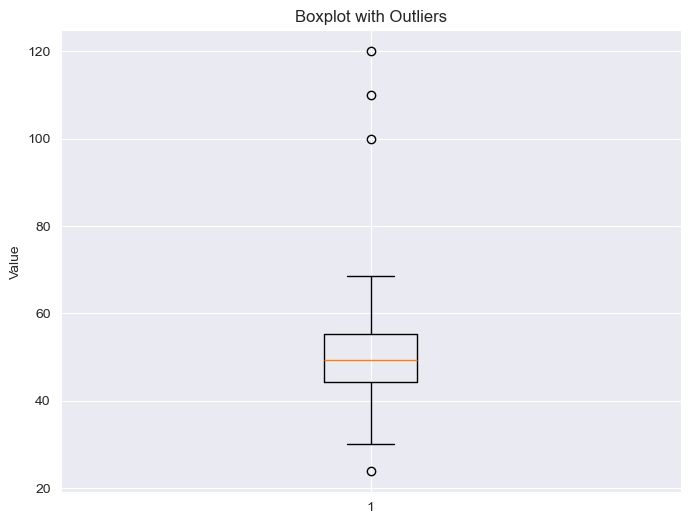


이상치 데이터:
          Value
74    23.802549
100  100.000000
101  110.000000
102  120.000000
이상치 개수: 4
상하위 이상치 기준점:
 - Lower Bound (하위 이상치 기준점): 27.54
 - Upper Bound (상위 이상치 기준점): 71.92

이상치 개수:
 - 상위 이상치 개수 (Upper Outliers): 3
 - 하위 이상치 개수 (Lower Outliers): 1

상위 이상치 데이터 (상위 5개):
     Value
102  120.0
101  110.0
100  100.0

하위 이상치 데이터 (상위 5개):
        Value
74  23.802549


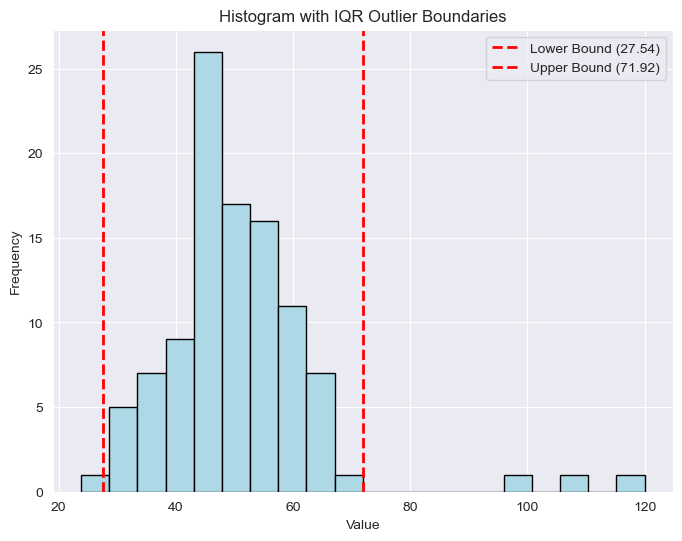

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 예제 데이터 생성
# 정상적인 분포를 가지는 데이터와 몇 개의 이상치를 포함한 데이터 생성
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=100) # 평균 50, 표준편차 10 정규분포 
outliers = np.array([100, 110, 120])
data = np.concatenate([normal_data, outliers])

# 2. 데이터프레임 생성
df = pd.DataFrame(data, columns=['Value'])

# 3. 박스플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(df['Value'])
plt.title('Boxplot with Outliers')
plt.ylabel('Value')
plt.show()

# 4. IQR 계산 및 이상치 탐지
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 상하위 이상치 개수 계산
lower_outliers = df[df['Value'] < lower_bound]
upper_outliers = df[df['Value'] > upper_bound]

print("\n이상치 데이터:")
# 이상치 탐지
outliers = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]
print(outliers)
print(f"이상치 개수: {len(outliers)}")

print(f"상하위 이상치 기준점:")
print(f" - Lower Bound (하위 이상치 기준점): {lower_bound:.2f}")
print(f" - Upper Bound (상위 이상치 기준점): {upper_bound:.2f}")

print(f"\n이상치 개수:")
print(f" - 상위 이상치 개수 (Upper Outliers): {len(upper_outliers)}")
print(f" - 하위 이상치 개수 (Lower Outliers): {len(lower_outliers)}")

print("\n상위 이상치 데이터 (상위 5개):")
print(upper_outliers.sort_values('Value', ascending=False).head())

print("\n하위 이상치 데이터 (상위 5개):")
print(lower_outliers.sort_values('Value', ascending=True).head())

# 5. IQR과 이상치 범위 시각화
plt.figure(figsize=(8, 6))
plt.hist(df['Value'], bins=20, color='lightblue', edgecolor='black')
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=2, label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=2, label=f'Upper Bound ({upper_bound:.2f})')
plt.title('Histogram with IQR Outlier Boundaries')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# 층화추출

In [42]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# 예제 데이터 생성
data = {
    '성별': ['남', '여', '남', '여', '남', '여', '남', '여', '남', '여'],
    '나이': [20, 25, 30, 22, 28, 35, 27, 23, 32, 29],
    '점수': [80, 90, 70, 95, 85, 92, 75, 88, 93, 82]
}
df = pd.DataFrame(data)
print(df)

  성별  나이  점수
0  남  20  80
1  여  25  90
2  남  30  70
3  여  22  95
4  남  28  85
5  여  35  92
6  남  27  75
7  여  23  88
8  남  32  93
9  여  29  82


In [46]:

# 층화 기준 컬럼
stratify_cols = ['성별'] 

# 훈련, 검증, 테스트셋 비율
train_ratio = 0.7
val_ratio = 0.15

# 데이터프레임 복사 (원본 데이터 보존)
df_split = df.copy()
df_split['dataset'] = ''

# 층화 기준 컬럼의 고유한 조합 추출
unique_combinations = df_split[stratify_cols].drop_duplicates()
print("고유 조합 : ")
print(unique_combinations)

고유 조합 : 
  성별
0  남
1  여


In [47]:
# 각 조합별로 반복
for _, combination in tqdm(unique_combinations.iterrows(), total=len(unique_combinations)):
    print(f"\n현재 조합: {combination.values}")  # 현재 처리 중인 조합 출력

    # 현재 조합에 해당하는 데이터 추출
    group = df_split[(df_split[stratify_cols] == combination.values).all(axis=1)]
    print(f"추출된 데이터:\n{group}")  # 추출된 데이터 출력

    # 데이터 개수 계산
    n = len(group)
    train_n = int(n * train_ratio)
    val_n = int(n * val_ratio)
    print(f"전체 데이터 개수: {n}, 훈련셋: {train_n}, 검증셋: {val_n}")

    # 데이터 섞기
    shuffled = group.sample(frac=1, random_state=42)
    print(f"섞인 데이터:\n{shuffled}")  # 섞인 데이터 출력
    # 데이터셋 분할 및 dataset 컬럼 할당
    df_split.loc[shuffled.index[:train_n], 'dataset'] = 'train'
    df_split.loc[shuffled.index[train_n:train_n + val_n], 'dataset'] = 'val'
    df_split.loc[shuffled.index[train_n + val_n:], 'dataset'] = 'test'
    print(f"dataset 컬럼 할당 후 데이터:\n{df_split[df_split[stratify_cols] == combination.values].all(axis=1)}")  # dataset 컬럼 할당 후 데이터 출력

100%|██████████| 2/2 [00:00<00:00, 49.50it/s]


현재 조합: ['남']
추출된 데이터:
  성별  나이  점수 dataset
0  남  20  80        
2  남  30  70        
4  남  28  85        
6  남  27  75        
8  남  32  93        
전체 데이터 개수: 5, 훈련셋: 3, 검증셋: 0
섞인 데이터:
  성별  나이  점수 dataset
2  남  30  70        
8  남  32  93        
4  남  28  85        
0  남  20  80        
6  남  27  75        
dataset 컬럼 할당 후 데이터:
0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

현재 조합: ['여']
추출된 데이터:
  성별  나이  점수 dataset
1  여  25  90        
3  여  22  95        
5  여  35  92        
7  여  23  88        
9  여  29  82        
전체 데이터 개수: 5, 훈련셋: 3, 검증셋: 0
섞인 데이터:
  성별  나이  점수 dataset
3  여  22  95        
9  여  29  82        
5  여  35  92        
1  여  25  90        
7  여  23  88        
dataset 컬럼 할당 후 데이터:
0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool


In [48]:
# 최종 결과 출력
print("\n최종 결과:\n", df_split)


최종 결과:
   성별  나이  점수 dataset
0  남  20  80    test
1  여  25  90    test
2  남  30  70   train
3  여  22  95   train
4  남  28  85   train
5  여  35  92   train
6  남  27  75    test
7  여  23  88    test
8  남  32  93   train
9  여  29  82   train


In [49]:

# 데이터셋 분할 비율 확인
print("\n데이터셋 분할 비율:")
print(df_split['dataset'].value_counts(normalize=True))


데이터셋 분할 비율:
dataset
train    0.6
test     0.4
Name: proportion, dtype: float64


# 층화추출 심화 예제

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# 더 다양한 데이터 생성
np.random.seed(42)  # 랜덤 결과 재현 가능하도록 설정
n_samples = 100

data = {
    '성별': np.random.choice(['남', '여'], size=n_samples),
    '나이대': np.random.choice(['20대', '30대', '40대', '50대'], size=n_samples),
    '지역': np.random.choice(['서울', '경기', '부산', '인천'], size=n_samples),
    '점수': np.random.randint(50, 100, size=n_samples)
}
df = pd.DataFrame(data)
print(df)

   성별  나이대  지역  점수
0   남  40대  부산  82
1   여  30대  인천  50
2   남  30대  부산  68
3   남  50대  서울  51
4   남  30대  인천  93
.. ..  ...  ..  ..
95  여  30대  인천  85
96  여  30대  경기  82
97  여  50대  부산  53
98  여  20대  서울  82
99  남  40대  인천  63

[100 rows x 4 columns]


In [3]:

# 층화 기준 컬럼 3개
stratify_cols = ['성별', '나이대', '지역']

# 훈련, 검증, 테스트셋 비율
train_ratio = 0.7
val_ratio = 0.15

# 데이터프레임 복사 (원본 데이터 보존)
df_split = df.copy()
df_split['dataset'] = ''

# 층화 기준 컬럼의 고유한 조합 추출
unique_combinations = df_split[stratify_cols].drop_duplicates()

# 각 조합별로 반복
for _, combination in tqdm(unique_combinations.iterrows(), total=len(unique_combinations)):
    # 현재 조합에 해당하는 데이터 추출
    group = df_split[(df_split[stratify_cols] == combination.values).all(axis=1)]
    print(f"추출된 데이터:\n{group}")  # 추출된 데이터 출력

    # 데이터 개수 계산
    n = len(group)
    train_n = int(n * train_ratio)
    val_n = int(n * val_ratio)
    print(f"전체 데이터 개수: {n}, 훈련셋: {train_n}, 검증셋: {val_n}")

    # 데이터 섞기
    shuffled = group.sample(frac=1, random_state=42)
    print(f"섞인 데이터:\n{shuffled}")  # 섞인 데이터 출력
    
    # 데이터셋 분할 및 dataset 컬럼 할당
    df_split.loc[shuffled.index[:train_n], 'dataset'] = 'train'
    df_split.loc[shuffled.index[train_n:train_n + val_n], 'dataset'] = 'val'
    df_split.loc[shuffled.index[train_n + val_n:], 'dataset'] = 'test'

# 최종 결과 출력
print("\n최종 결과:\n", df_split)

# 데이터셋 분할 비율 확인
print("\n데이터셋 분할 비율:")
print(df_split['dataset'].value_counts(normalize=True))

# 각 그룹별 데이터셋 분할 비율 확인 (예시: '성별' 그룹)
print("\n각 그룹별 데이터셋 분할 비율 (성별):")
for gender in df['성별'].unique():
    print(f"\n성별: {gender}")
    print(df_split[df_split['성별'] == gender]['dataset'].value_counts(normalize=True))

100%|██████████| 30/30 [00:00<00:00, 288.42it/s]

추출된 데이터:
   성별  나이대  지역  점수 dataset
0   남  40대  부산  82        
11  남  40대  부산  66        
38  남  40대  부산  89        
전체 데이터 개수: 3, 훈련셋: 2, 검증셋: 0
섞인 데이터:
   성별  나이대  지역  점수 dataset
0   남  40대  부산  82        
11  남  40대  부산  66        
38  남  40대  부산  89        
추출된 데이터:
   성별  나이대  지역  점수 dataset
1   여  30대  인천  50        
75  여  30대  인천  60        
89  여  30대  인천  95        
95  여  30대  인천  85        
전체 데이터 개수: 4, 훈련셋: 2, 검증셋: 0
섞인 데이터:
   성별  나이대  지역  점수 dataset
75  여  30대  인천  60        
95  여  30대  인천  85        
1   여  30대  인천  50        
89  여  30대  인천  95        
추출된 데이터:
   성별  나이대  지역  점수 dataset
2   남  30대  부산  68        
13  남  30대  부산  73        
64  남  30대  부산  58        
전체 데이터 개수: 3, 훈련셋: 2, 검증셋: 0
섞인 데이터:
   성별  나이대  지역  점수 dataset
2   남  30대  부산  68        
13  남  30대  부산  73        
64  남  30대  부산  58        
추출된 데이터:
   성별  나이대  지역  점수 dataset
3   남  50대  서울  51        
12  남  50대  서울  87        
15  남  50대  서울  83        
62  남  50대  서울  86        
63  남  50대  서울  

# 판다스 필터링

In [15]:
import pandas as pd

data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)
print(df)

# A > 2 and B < 6 조건을 만족하는 행 선택
selected_rows = df[(df['A'] > 2) & (df['B'] <= 6)]

print()
print(selected_rows)

print()
df = selected_rows.reset_index(drop=True)
print(df)


   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9

   A  B  C
2  3  6  9

   A  B  C
0  3  6  9


In [35]:
import pandas as pd
#### loc -> [행, 열] 으로 데이터 선택

data = {'이름': ['철수', '영희', '민수'], 
        '나이': [20, 22, 25], 
        '점수': [80, 90, 75]}
df = pd.DataFrame(data, index=['학생1', '학생2', '학생3'])
print(df)

     이름  나이  점수
학생1  철수  20  80
학생2  영희  22  90
학생3  민수  25  75


In [36]:

# '학생2' 행의 '점수' 값 가져오기
score = df.loc['학생2', '점수'] 
print(score)  # 출력: 90

90


In [24]:

# '학생1'과 '학생3' 행의 '이름'과 '나이' 컬럼 가져오기
subset = df.loc[['학생1', '학생3'], ['이름', '나이']]
print(subset)

     이름  나이
학생1  철수  20
학생3  민수  25


In [25]:
# '나이'가 22보다 큰 모든 행의 '점수' 컬럼 수정
df.loc[df['나이'] > 22, '점수'] = 85
print(df)

     이름  나이  점수
학생1  철수  20  80
학생2  영희  22  90
학생3  민수  25  85


# 판다스 필터링 0 들어가있으면 삭제
##  df.loc[lambda df: (df != 0).all(axis=1)]

In [4]:
import pandas as pd

# 간단한 예시 데이터프레임 생성
data = {
    'DAY_TYPE': [1, 0, 2, 3, 0, 4],
    'LEN': [100, 200, 0, 300, 400, 500],
    'TIME_GAP': [50, 0, 30, 0, 10, 45]
}

df = pd.DataFrame(data)

# 원본 데이터프레임 출력
print("원본 데이터프레임:")
print(df)

# df != 0의 결과
boolean_mask = df != 0

print("\nBoolean Mask:")
print(boolean_mask)

# 0이 포함된 행을 제거하는 과정
filtered_df = df.loc[lambda df: (df != 0).all(axis=1)]

# 필터링 후의 데이터프레임 출력
print("\n0이 포함된 행을 제거한 데이터프레임:")
print(filtered_df)


원본 데이터프레임:
   DAY_TYPE  LEN  TIME_GAP
0         1  100        50
1         0  200         0
2         2    0        30
3         3  300         0
4         0  400        10
5         4  500        45

Boolean Mask:
   DAY_TYPE    LEN  TIME_GAP
0      True   True      True
1     False   True     False
2      True  False      True
3      True   True     False
4     False   True      True
5      True   True      True

0이 포함된 행을 제거한 데이터프레임:
   DAY_TYPE  LEN  TIME_GAP
0         1  100        50
5         4  500        45


## 판다스 범주형 데이터 변환 df['DAY_TYPE'].astype('category')

In [7]:
import pandas as pd

# 예시 데이터프레임 생성
data = {
    'DAY_TYPE': [1, 2, 3, 1, 2, 3],
    'BUSINFOUNIT_ID': ['000010002', '000010004', '000010006', '000010002', '000010004', '000010006']
}

df = pd.DataFrame(data)

# 변환 전 메모리 사용량 확인
print("Before optimization:")
print(df.memory_usage(deep=True))

# 데이터 타입을 category로 변환
df['DAY_TYPE'] = df['DAY_TYPE'].astype('category')
df['BUSINFOUNIT_ID'] = df['BUSINFOUNIT_ID'].astype('category')

# 변환 후 메모리 사용량 확인
print("\nAfter optimization:")
print(df.memory_usage(deep=True))


Before optimization:
Index             128
DAY_TYPE           48
BUSINFOUNIT_ID    396
dtype: int64

After optimization:
Index             128
DAY_TYPE          138
BUSINFOUNIT_ID    312
dtype: int64


## 판다스 df.dropna(how='all')

In [8]:
import pandas as pd
import numpy as np

# 예시 데이터프레임 생성
data = {
    'A': [1, 2, np.nan, 4],
    'B': [np.nan, np.nan, np.nan, 5],
    'C': [np.nan, 3, np.nan, np.nan]
}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# 모든 값이 NaN인 행 제거
df_cleaned = df.dropna(how='all')

print("\nDataFrame after dropping rows where all elements are NaN:")
print(df_cleaned)


Original DataFrame:
     A    B    C
0  1.0  NaN  NaN
1  2.0  NaN  3.0
2  NaN  NaN  NaN
3  4.0  5.0  NaN

DataFrame after dropping rows where all elements are NaN:
     A    B    C
0  1.0  NaN  NaN
1  2.0  NaN  3.0
3  4.0  5.0  NaN
